<a href="https://colab.research.google.com/github/guruboy001/machine_learning_codes/blob/master/Answer_to_Dimensionality_Reduction_Questions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
data = fetch_openml('mnist_784',version=1)

In [49]:
X_train,X_test, y_train, y_test = train_test_split(data['data'],data['target'],test_size=10000,random_state =42)

In [4]:
import timeit
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

In [5]:

#t = timeit.Timer(setup="clf",stmt="RandomForestClassifier.fit(X_train,y_train)")


In [6]:
%%timeit
clf.fit(X_train,y_train)

1 loop, best of 3: 52 s per loop


In [7]:
y_pred = clf.predict(X_test)
accuracy_score(y_pred,y_test)

0.9657

In [8]:
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

pca = PCA(n_components=0.95)

In [9]:
X_train = pca.fit_transform(X_train)
X_test = pca.fit_transform(X_test)

In [10]:
len(X_train)

60000

In [11]:
%%timeit
clf.fit(X_train,y_train)

1 loop, best of 3: 2min 5s per loop


In [12]:

pipe = Pipeline([
                 ("pca",PCA(n_components=0.95)),
                 ("clf",RandomForestClassifier())
])


In [13]:
pipe.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('pca',
                 PCA(copy=True, iterated_power='auto', n_components=0.95,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('clf',
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features='auto',
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=100, n_jobs=None,
                                        oob_score=False, random_state=None,
                 

In [45]:
import time
t0 = time.time()
pipe.fit(X_train,y_train)
t1 = time.time()
print("traninig took {: .2f}s".format(t1-t0))

traninig took  140.65s


In [41]:
from sklearn.decomposition import PCA
pca = PCA(n_components=154)
X_test = pca.fit_transform(X_test)

In [42]:
y_pred2 = pipe.predict(X_test)


In [43]:
accuracy_score(y_pred2,y_test)

0.1224

Using TSNE 

In [46]:
# Generate a random subset of 10000 training set from the trainning set loaded above
np.random.seed(42)
random_index = np.random.randint(0,60000,10000,dtype=int)

In [85]:
#Reload the trainning set
X_train,X_test, y_train, y_test = train_test_split(data['data'],data['target'],test_size=10000,random_state =42)

In [86]:
X_train = X_train[random_index,:]
y=y_train[random_index]

In [60]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2,random_state=42)
X_reduced = tsne.fit_transform(X_train)

Matplotlib didn't accept y for being an array of strings. Therefore the conversion to int

In [87]:
y_int =[]
for i in y:
    y_int.append(int(i))

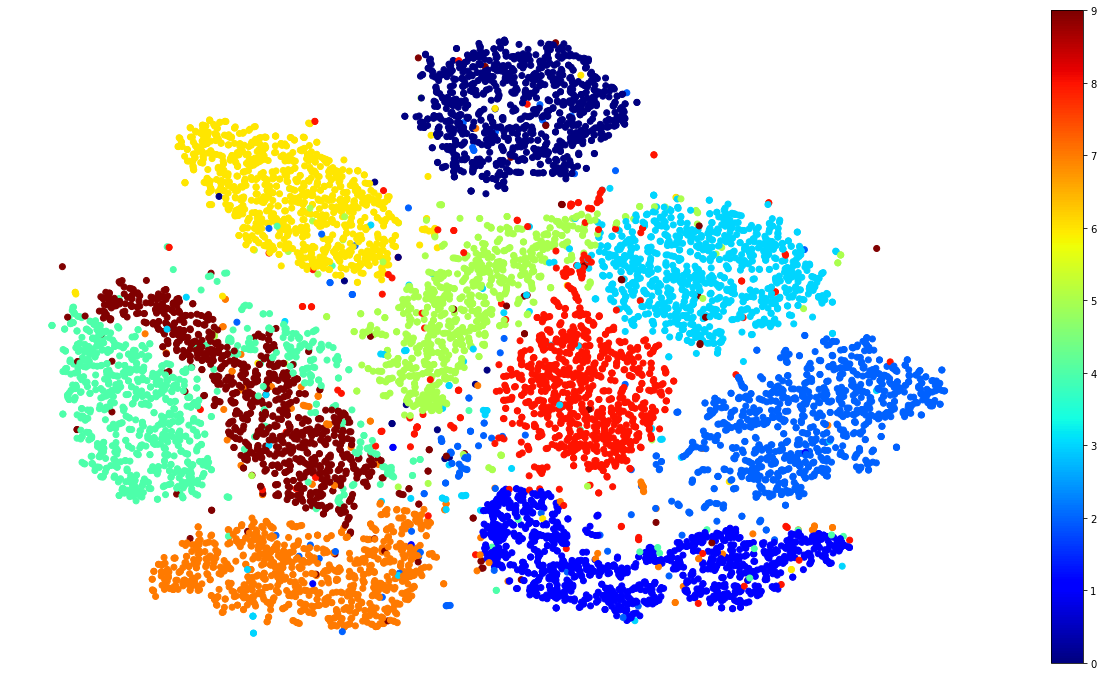

In [94]:
import matplotlib.pyplot as plt

plt.figure(figsize=(22,12))
plt.scatter(X_reduced[:,0],X_reduced[:,1],c=y_int,cmap="jet")
plt.colorbar()
plt.axis("off")
plt.show()